In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
sys.path.append(os.path.abspath("../.."))

from moabb.datasets import BI2013a

from preprocessing.power import FRMS
from preprocessing.data_processing import get_clean_epochs, Lagger

In [3]:
dataset=BI2013a()
epochs = get_clean_epochs(dataset, subjects_list=[1])

Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns


/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data 

Adding metadata with 3 columns
3840 matching events found
No baseline correction applied
Dataset median value:  -2.3990550088478453e-07


In [4]:
epochs.metadata

,subject,session,run
0,1,1,2
1,1,1,2
2,1,1,2
3,1,1,2
4,1,1,2
...,...,...,...
3834,1,5,2
3835,1,5,2
3836,1,5,2
3837,1,5,2


In [5]:
epochs.metadata.session.unique()

array(['1', '6', '4', '0', '2', '3', '7', '5'], dtype=object)

In [6]:
session = "0"
epochs = epochs[epochs.metadata.session == session]

In [7]:
epochs

<EpochsArray | 336 events (all good), 0 – 1 s (baseline off), ~21.1 MB, data loaded, with metadata,
 'Target': 42
 'NonTarget': 294>

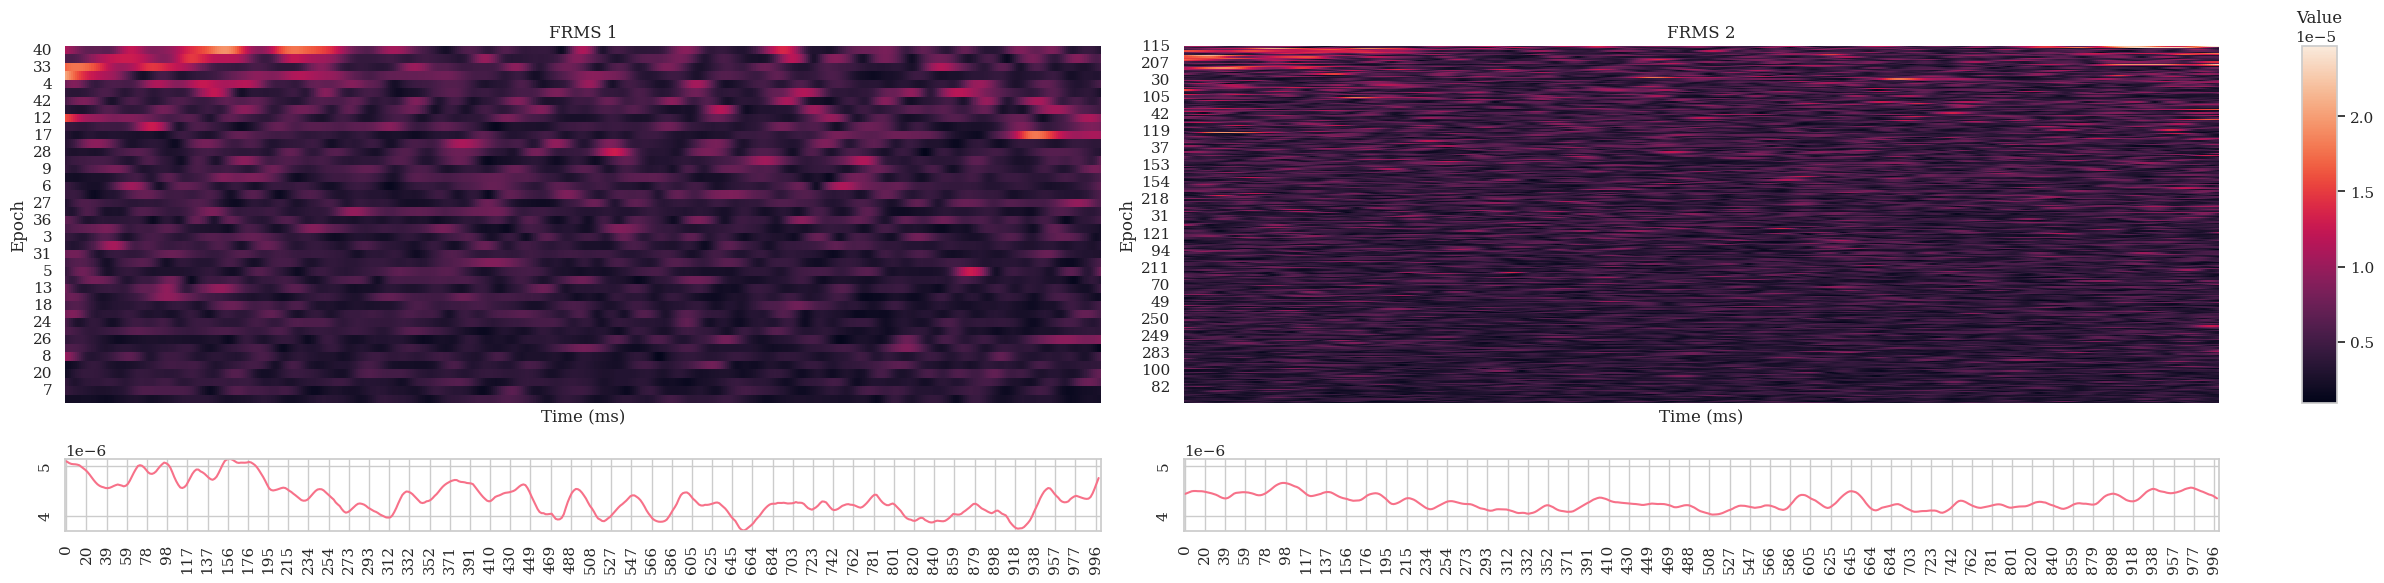

In [11]:
frms = FRMS(epochs["Target"])
frms_ntg = FRMS(epochs["NonTarget"])

frms.plot_compare(frms_ntg)

Spatial and Temporal Filters converged.


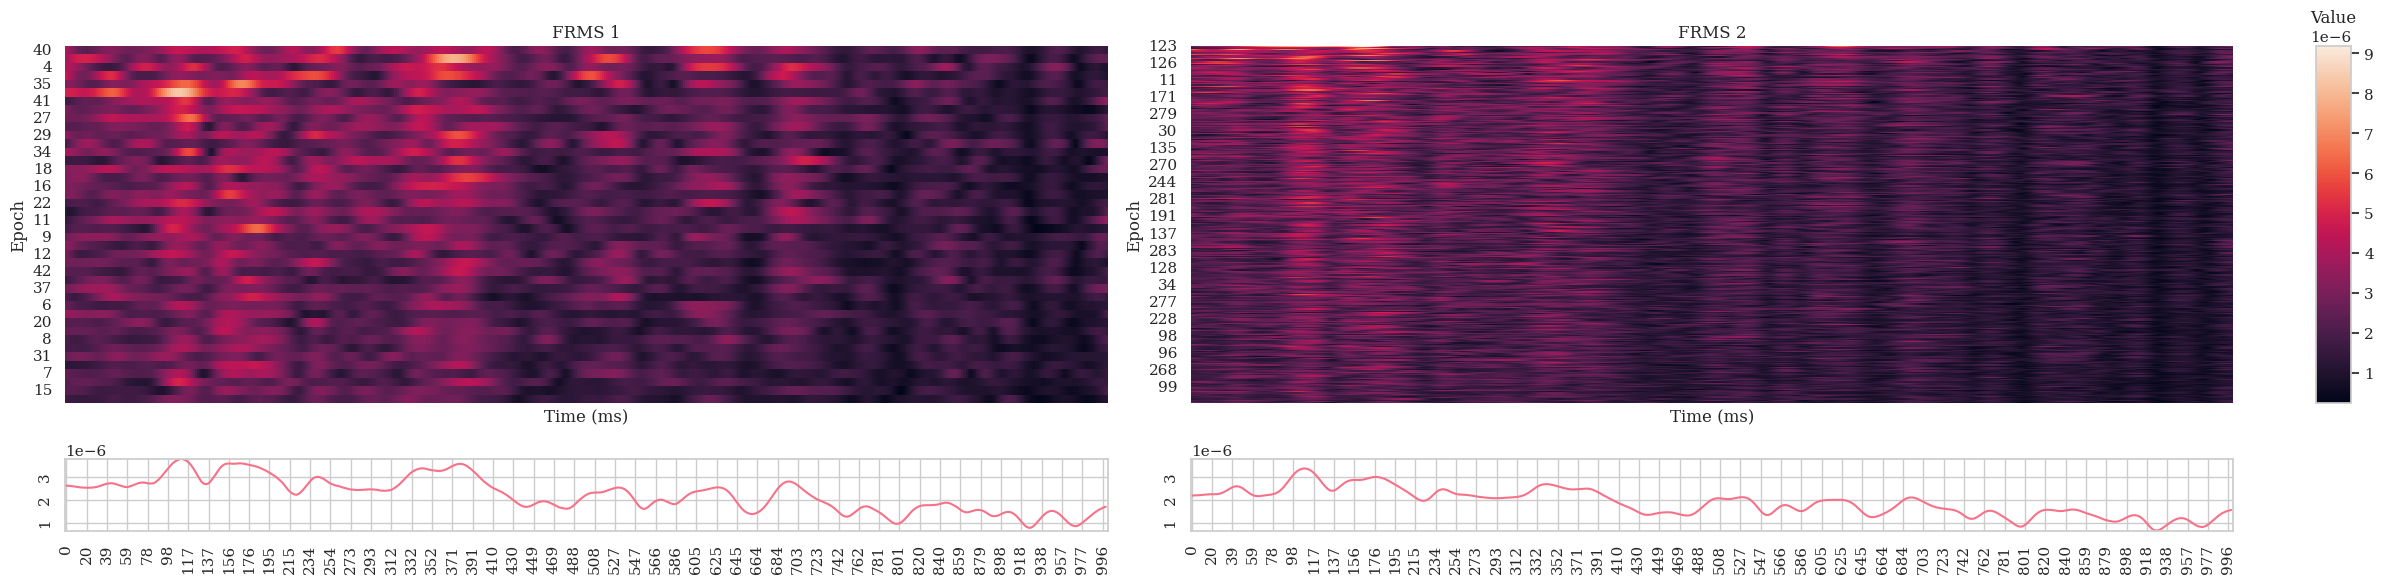

In [10]:
from preprocessing.data_processing_iterative import AltFilters

alt_filter = AltFilters(epochs, p=16)
filtered_epochs, _ = alt_filter.fit_and_apply(class_="Target", plot_it=False)

frms = FRMS(filtered_epochs["Target"])
frms_ntg = FRMS(filtered_epochs["NonTarget"])

frms.plot_compare(frms_ntg)

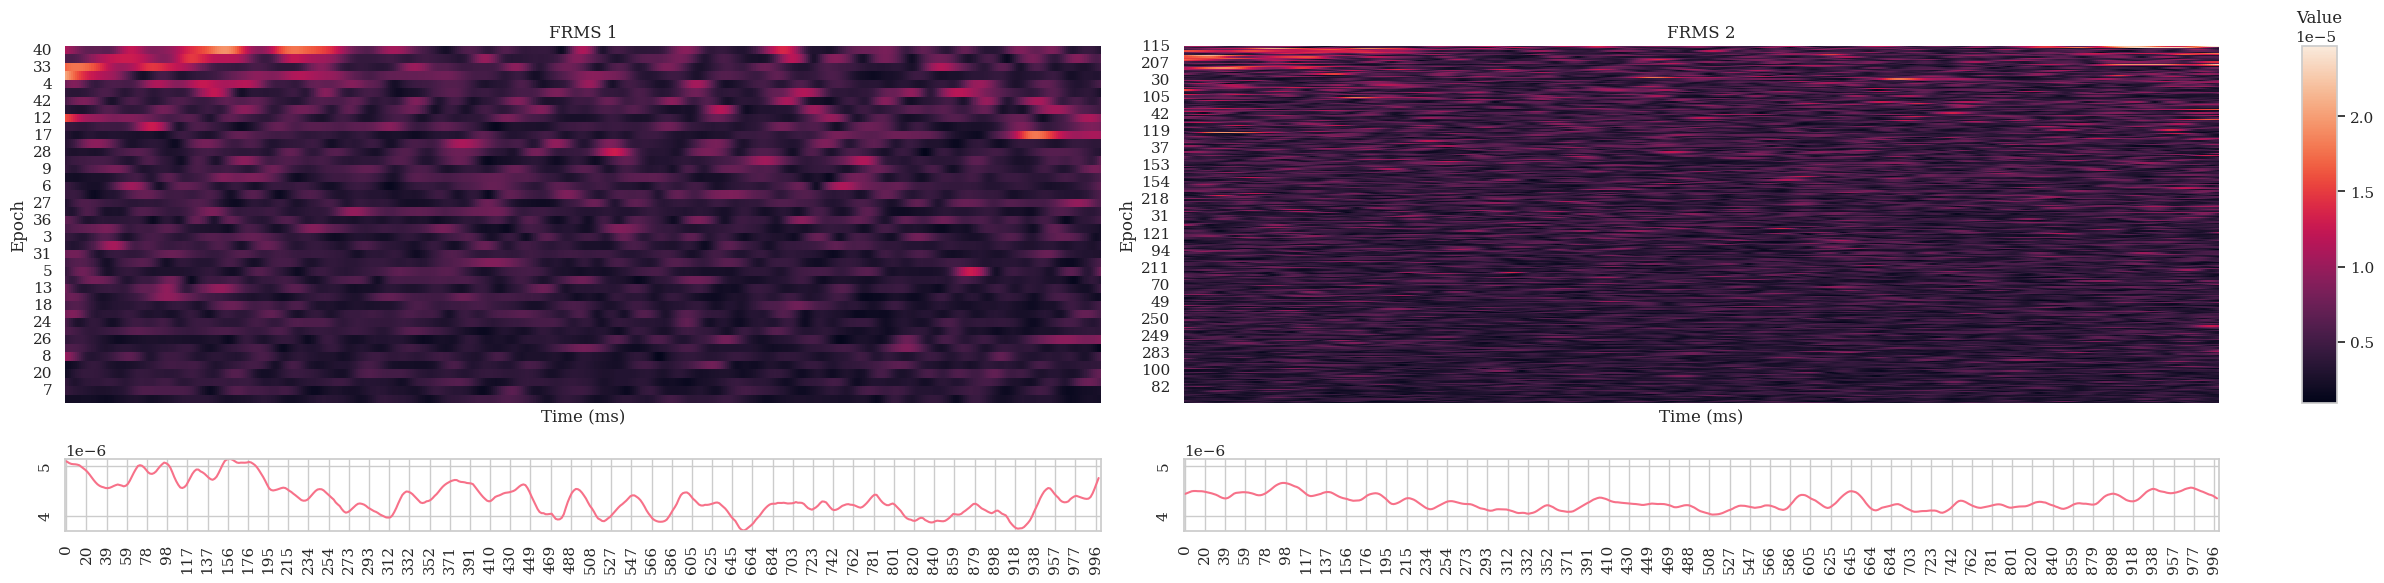

In [13]:
from preprocessing.data_processing import Filter
spatial_filter= Filter(epochs, p=16, spatial=True)
spatial_filter.fit(class_= "Target")
spat_filt_epochs = spatial_filter.apply(epochs)
frms = FRMS(spat_filt_epochs["Target"])
frms_ntg = FRMS(spat_filt_epochs["NonTarget"])
frms.plot_compare(frms_ntg)

Spatial filter does not alter using the max rank (16)

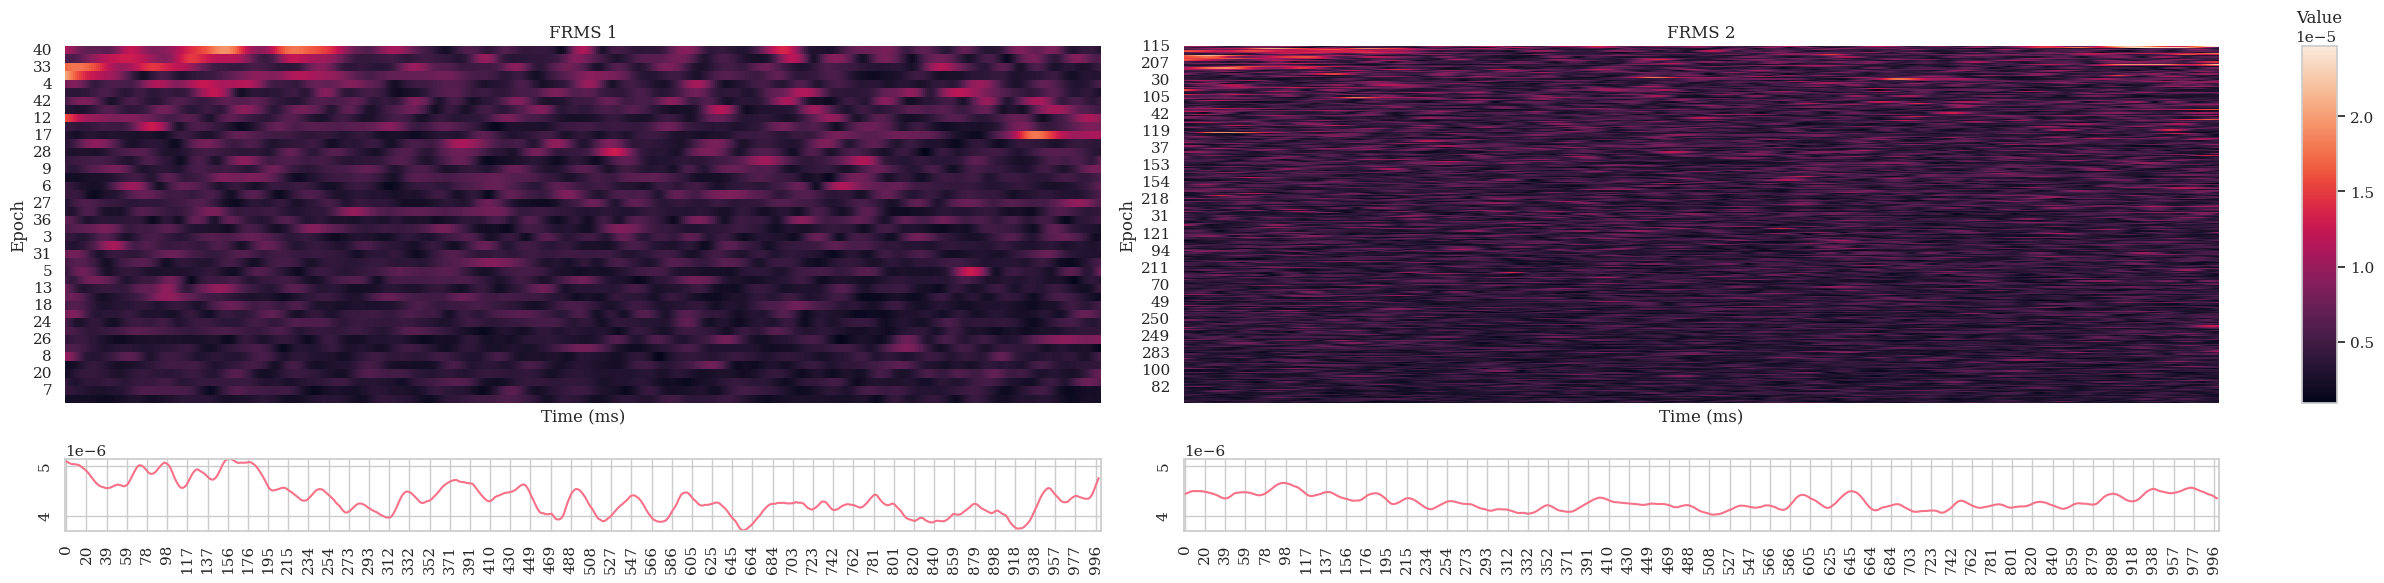

In [16]:
temporal_filter= Filter(epochs, p=148, spatial=False)
temporal_filter.fit(class_= "Target")
temp_filt_epochs = temporal_filter.apply(epochs)
frms = FRMS(temp_filt_epochs["Target"])
frms_ntg = FRMS(temp_filt_epochs["NonTarget"])
frms.plot_compare(frms_ntg)

Max rank of temporal covariance matrices is 148 (out of 513)

In [ ]:
S